In [1]:
import numpy as np
import pandas as pd

In [2]:
conditions = pd.read_csv("scores.csv")

In [3]:
conditions = conditions[conditions.number.str.startswith("condition")]
conditions

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [4]:
import os
sum_dict = {}
for file in os.listdir("condition"):
    df = pd.read_csv("condition" + "/" + file)
    sum_dict[file.split(".")[0]] = df.activity.sum()
sum_dict

{'condition_1': 3415660,
 'condition_10': 6243346,
 'condition_11': 2974516,
 'condition_12': 3354049,
 'condition_13': 5735146,
 'condition_14': 1624530,
 'condition_15': 2391019,
 'condition_16': 6128175,
 'condition_17': 1848268,
 'condition_18': 1517859,
 'condition_19': 3338367,
 'condition_2': 5981554,
 'condition_20': 1413779,
 'condition_21': 1628308,
 'condition_22': 3521753,
 'condition_23': 6379462,
 'condition_3': 5743208,
 'condition_4': 5925033,
 'condition_5': 3594618,
 'condition_6': 4209793,
 'condition_7': 5805537,
 'condition_8': 3569050,
 'condition_9': 3632316}

In [5]:
sums = pd.DataFrame(pd.Series(sum_dict))
sums.columns = ["Sum"]
sums

,Sum
condition_1,3415660
condition_10,6243346
condition_11,2974516
condition_12,3354049
condition_13,5735146
condition_14,1624530
condition_15,2391019
condition_16,6128175
condition_17,1848268
condition_18,1517859


In [6]:
conditions = conditions.set_index("number").join(sums).reset_index()

In [7]:
conditions

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,Sum
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,3415660
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,5981554
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,5743208
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,5925033
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,3594618
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,4209793
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,5805537
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,3569050
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,3632316
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,6243346


In [8]:
conditions.at[21, "edu"] = "6-10"
conditions

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,Sum
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,3415660
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,5981554
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,5743208
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,5925033
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,3594618
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,4209793
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,5805537
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,3569050
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,3632316
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,6243346


In [9]:
conditions["Stress"] = conditions.Sum / conditions.days
conditions

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,Sum,Stress
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,3415660,310514.545455
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,5981554,332308.555556
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,5743208,441785.230769
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,5925033,455771.769231
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,3594618,276509.076923
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,4209793,601399.000000
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,5805537,527776.090909
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,3569050,713810.000000
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,3632316,279408.923077
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,6243346,693705.111111


In [10]:
conditions.melanch.fillna(2.0, inplace = True)
conditions


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,Sum,Stress
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,3415660,310514.545455
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,5981554,332308.555556
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,5743208,441785.230769
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,5925033,455771.769231
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,3594618,276509.076923
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,4209793,601399.000000
6,condition_7,11,1,20-24,1.0,2.0,2.0,11-15,2.0,1.0,24.0,25.0,5805537,527776.090909
7,condition_8,5,2,25-29,2.0,2.0,2.0,11-15,1.0,2.0,20.0,16.0,3569050,713810.000000
8,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,3632316,279408.923077
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,6243346,693705.111111


In [11]:
conditions = conditions.drop(columns = ["number", "Sum", "days"])
conditions

,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,Stress
0,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,310514.545455
1,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,332308.555556
2,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,441785.230769
3,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,455771.769231
4,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,276509.076923
5,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,601399.000000
6,1,20-24,1.0,2.0,2.0,11-15,2.0,1.0,24.0,25.0,527776.090909
7,2,25-29,2.0,2.0,2.0,11-15,1.0,2.0,20.0,16.0,713810.000000
8,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,279408.923077
9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,693705.111111


In [12]:
list(conditions.columns)

['gender',
 'age',
 'afftype',
 'melanch',
 'inpatient',
 'edu',
 'marriage',
 'work',
 'madrs1',
 'madrs2',
 'Stress']

In [13]:
categoricals = list(conditions.columns)[:-3]
categoricals

['gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

In [14]:
conditions

,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,Stress
0,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,310514.545455
1,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,332308.555556
2,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,441785.230769
3,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,455771.769231
4,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,276509.076923
5,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,601399.000000
6,1,20-24,1.0,2.0,2.0,11-15,2.0,1.0,24.0,25.0,527776.090909
7,2,25-29,2.0,2.0,2.0,11-15,1.0,2.0,20.0,16.0,713810.000000
8,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,279408.923077
9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,693705.111111


In [15]:
for c in categoricals:
    conditions[c] = conditions[c].astype("category").cat.codes
conditions

,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,Stress
0,1,3,1,1,1,2,0,1,19.0,19.0,310514.545455
1,1,4,0,1,1,2,1,1,24.0,11.0,332308.555556
2,0,5,1,1,1,2,1,1,24.0,25.0,441785.230769
3,1,1,1,1,1,0,0,0,20.0,16.0,455771.769231
4,1,6,1,1,1,0,1,1,26.0,26.0,276509.076923
5,0,3,1,1,1,2,0,1,18.0,15.0,601399.000000
6,0,0,0,1,1,0,1,0,24.0,25.0,527776.090909
7,1,1,1,1,1,0,0,1,20.0,16.0,713810.000000
8,1,5,0,1,1,2,0,1,26.0,26.0,279408.923077
9,1,5,1,1,1,2,0,1,28.0,21.0,693705.111111


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(conditions.Stress.values.reshape(-1,1))

In [17]:
conditions.Stress = sc.fit_transform(conditions.Stress.values.reshape(-1,1))
conditions


,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,Stress
0,1,3,1,1,1,2,0,1,19.0,19.0,-0.117986
1,1,4,0,1,1,2,1,1,24.0,11.0,0.006325
2,0,5,1,1,1,2,1,1,24.0,25.0,0.630768
3,1,1,1,1,1,0,0,0,20.0,16.0,0.710546
4,1,6,1,1,1,0,1,1,26.0,26.0,-0.311949
5,0,3,1,1,1,2,0,1,18.0,15.0,1.541188
6,0,0,0,1,1,0,1,0,24.0,25.0,1.121251
7,1,1,1,1,1,0,0,1,20.0,16.0,2.182368
8,1,5,0,1,1,2,0,1,26.0,26.0,-0.295409
9,1,5,1,1,1,2,0,1,28.0,21.0,2.067692


In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')


for c in categoricals:
    enc_df = pd.DataFrame(enc.fit_transform(conditions[[c]]).toarray())
    # conditions = conditions.drop(columns = c).join(enc_df, lsuffix = c[0])
conditions
# conditions.columns = conditions.columns.astype(str)
# conditions


,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,Stress
0,1,3,1,1,1,2,0,1,19.0,19.0,-0.117986
1,1,4,0,1,1,2,1,1,24.0,11.0,0.006325
2,0,5,1,1,1,2,1,1,24.0,25.0,0.630768
3,1,1,1,1,1,0,0,0,20.0,16.0,0.710546
4,1,6,1,1,1,0,1,1,26.0,26.0,-0.311949
5,0,3,1,1,1,2,0,1,18.0,15.0,1.541188
6,0,0,0,1,1,0,1,0,24.0,25.0,1.121251
7,1,1,1,1,1,0,0,1,20.0,16.0,2.182368
8,1,5,0,1,1,2,0,1,26.0,26.0,-0.295409
9,1,5,1,1,1,2,0,1,28.0,21.0,2.067692


In [19]:
# conditions
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
x=conditions.drop(columns="Stress")
# reg.fit(conditions.drop(columns = "Stress"), conditions.Stress)
# reg.fit(x,conditions.Stress)
y=conditions.Stress
reg.fit(x,y)

RandomForestRegressor()

In [20]:
from sklearn.metrics import r2_score
r2_score(conditions.Stress, reg.predict(conditions.drop(columns = "Stress")))

0.8385116300968769

In [21]:
df2=conditions.drop(columns="Stress")
df2
df=reg.predict(conditions.drop(columns = "Stress"))
df2

,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,1,3,1,1,1,2,0,1,19.0,19.0
1,1,4,0,1,1,2,1,1,24.0,11.0
2,0,5,1,1,1,2,1,1,24.0,25.0
3,1,1,1,1,1,0,0,0,20.0,16.0
4,1,6,1,1,1,0,1,1,26.0,26.0
5,0,3,1,1,1,2,0,1,18.0,15.0
6,0,0,0,1,1,0,1,0,24.0,25.0
7,1,1,1,1,1,0,0,1,20.0,16.0
8,1,5,0,1,1,2,0,1,26.0,26.0
9,1,5,1,1,1,2,0,1,28.0,21.0


In [22]:
conditions.Stress

0    -0.117986
1     0.006325
2     0.630768
3     0.710546
4    -0.311949
5     1.541188
6     1.121251
7     2.182368
8    -0.295409
9     2.067692
10   -0.677247
11   -0.294866
12    0.447491
13   -1.227260
14   -0.840041
15    0.295526
16   -1.078179
17   -1.223150
18   -0.424382
19   -1.268816
20   -1.174689
21   -0.454291
22    0.385108
Name: Stress, dtype: float64

In [23]:
single_entry = [[1,3,1,1,1,2,0,1,19.0,19.0]]
# Make prediction
prediction = reg.predict(single_entry)

print("Predicted stress value:", prediction)

Predicted stress value: [0.01344192]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
# data = pd.read_csv('your_dataset.csv')

# Preprocess the data
# For example, scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(conditions)

# Choose the number of clusters
n_clusters = 3  # You can choose this based on domain knowledge or using a method like the elbow method

# Fit K-means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(scaled_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
conditions['Cluster'] = cluster_labels

# Now you can analyze and interpret the clusters


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
conditions

,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,Stress,Cluster
0,1,3,1,1,1,2,0,1,19.0,19.0,-0.117986,1
1,1,4,0,1,1,2,1,1,24.0,11.0,0.006325,1
2,0,5,1,1,1,2,1,1,24.0,25.0,0.630768,1
3,1,1,1,1,1,0,0,0,20.0,16.0,0.710546,2
4,1,6,1,1,1,0,1,1,26.0,26.0,-0.311949,1
5,0,3,1,1,1,2,0,1,18.0,15.0,1.541188,1
6,0,0,0,1,1,0,1,0,24.0,25.0,1.121251,2
7,1,1,1,1,1,0,0,1,20.0,16.0,2.182368,2
8,1,5,0,1,1,2,0,1,26.0,26.0,-0.295409,1
9,1,5,1,1,1,2,0,1,28.0,21.0,2.067692,1


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

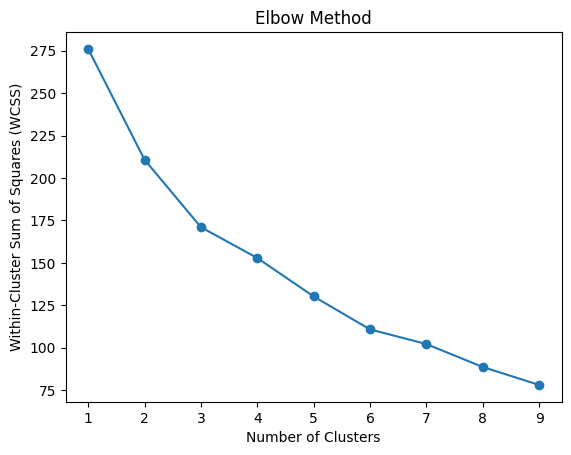

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset

# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(conditions)

# Choose a range of clusters to try
k_values = range(1, 10)
inertia_values = []

# Fit K-means for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()
